# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

BTC_data = requests.get(btc_url).json()
print(json.dumps(BTC_data, indent = 4))
BTC_data.keys()

BTC_price = BTC_data["data"]["1"]["quotes"]["CAD"]["price"]
BTC_price

# Fetch current ETH price

ETH_data = requests.get(eth_url).json()
print(json.dumps(ETH_data, indent = 4))
ETH_data.keys()

ETH_price = ETH_data["data"]["1027"]["quotes"]["CAD"]["price"]
ETH_price


# Compute current value of my crpto
my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19020493,
            "total_supply": 19020493,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39733.0,
                    "volume_24h": 14506287412,
                    "market_cap": 756127627106,
                    "percentage_change_1h": -0.199671754400407,
                    "percentage_change_24h": 0.430593658181857,
                    "percentage_change_7d": -1.77388631256801,
                    "percent_change_1h": -0.199671754400407,
                    "percent_change_24h": 0.430593658181857,
                    "percent_change_7d": -1.77388631256801
                },
                "CAD": {
                    "price": 50607.9221,
                    "volume_24h": 18476658276.6644,
                 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [8]:
# Set the tickers

ticker = ['AGG','SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Format current date as ISO format

today = pd.Timestamp("2022-04-19", tz="America/New_York").isoformat()


# Get current closing prices for SPY and AGG

df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df


# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Preview DataFrame
df_ticker.head(3)



AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-04-19 04:00:00+00:00  103.26  103.4264  102.974  103.02  7845969   

                                                      SPY                 \
                          trade_count        vwap    open   high     low   
timestamp                                                                  
2022-04-19 04:00:00+00:00       32656  103.193615  437.87  445.8  437.68   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-19 04:00:00+00:00  445.04  77678099      597840  443.072191

In [9]:
# Create and empty DataFrame for closing prices

df_closing = pd.DataFrame()


df_closing["AGG"] = df_ticker["AGG"]["close"]
df_closing["SPY"] = df_ticker["SPY"]["close"]



# Drop the time component of the date
df_closing.index = df_closing.index.date

# Pick AGG and SPY close prices
df_closing.head()

agg_close_price = df_ticker["AGG"]["close"]
agg_close_price.index = agg_close_price.index.date

spy_close_price = df_ticker["SPY"]["close"]
spy_close_price.index = spy_close_price.index.date

In [10]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2022-04-19    103.02
Name: close, dtype: float64
Current SPY closing price: $2022-04-19    445.04
Name: close, dtype: float64


In [11]:
# Compute the current value of shares

my_spy_value = float(agg_close_price) * my_spy
my_agg_value = float(spy_close_price) * my_agg

# Print current value of shares

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5151.00
The current value of your 200 AGG shares is $89008.00


### Savings Health Analysis

In [138]:
# Set monthly household income

monthly_income = 12000

crypto = my_btc_value + my_eth_value
#print(crypto)

shares = my_spy_value + my_agg_value
#print(shares)

# Consolidate financial assets data
total = crypto + shares

value_data = {'amount':[crypto,shares, total]}  #array of 1 row and 
#type(value_data)
assets=['crypto', 'shares', 'total']
#print(value_data )

#Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=assets)
df_savings.head()



,amount
crypto,80669.930881
shares,94159.000000
total,174828.930881


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

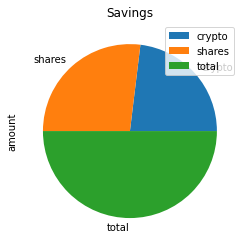

In [143]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Savings")

In [147]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
print(total)


# Validate saving health

if total > emergency_fund:
    print('congratulation')
else:
    print('comisaration')

36000
174828.9308807
congratulation


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG

# Set timeframe to "1Day"

timeframe = "1Day"

# Set the ticker information

tickers = ['AGG','SPY']

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Display sample data
df_stock_data.tail()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-03-28 04:00:00+00:00       27246  106.295912  452.05  455.910  450.060   
2022-03-29 04:00:00+00:00       33651  106.734051  460.07  462.070  457.180   
2022-03-30 04:00:00+00:00       24975  107.007713  460.29  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.92  458.760  451.160   
2022-04-01 04:00:00+00:00       40126  106.667931  453.30  453.460  449.140   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-03-28 04:00:00+00:00  455.84   68744767      624225  453.296491  
2022-03-29 04:00:00+00:00  461.53   86682895      738526  459.632992  
2022-03-30 04:00:00+00:00  458.79   79668682      659199  459.158702  
2022-03-31 04:00:00+00:00  452.11  118607132      751169  455.444107  
2022-04-01 04:00:00+00:00  452.92   88676014      624745  451.850848

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_30year.portfolio_data.tail()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-03-28 04:00:00+00:00       27246  106.295912     0.002451  452.05   
2022-03-29 04:00:00+00:00       33651  106.734051     0.004701  460.07   
2022-03-30 04:00:00+00:00       24975  107.007713     0.002714  460.29   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.92   
2022-04-01 04:00:00+00:00       40126  106.667931    -0.003268  453.30   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2022-03-28 04:00:00+00:00  455.910  450.060  455.84   68744767      624225   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53   86682895      738526   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79   79668682      659199   
2022-03-31 04:00:00+00:00  458.760  451.160  452.11  118607132      751169   
2022-04-01 04:00:00+00:00  453.460  449.140  452.92   88676014      624745   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-03-28 04:00:00+00:00  453.296491     0.006958  
2022-03-29 04:00:00+00:00  459.632992     0.012482  
2022-03-30 04:00:00+00:00  459.158702    -0.005937  
2022-03-31 04:00:00+00:00  455.444107    -0.014560  
2022-04-01 04:00:00+00:00  451.850848     0.001792

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Mirek\JUPITER\USYD-VIRT-FIN-PT-03-2022-U-LOL-main(1)\USYD-VIRT-FIN-PT-03-2022-U-LOL-main\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005477,0.997991,1.005446,1.001267,1.002898,1.011258,0.998590,1.012958,1.002680,0.997477,...,0.989923,1.002321,0.991642,0.996696,0.997366,1.001208,0.996874,1.009175,0.999600,0.999679
2,1.003972,0.998017,1.004913,1.005441,0.996504,1.015230,1.002477,1.022310,1.009944,0.999302,...,0.988934,1.004866,0.990070,0.996592,1.001546,0.992870,0.984659,1.007480,1.002071,0.998846
3,1.006288,0.997859,1.020722,1.008948,0.995044,1.015147,1.003292,1.015666,0.995134,0.997705,...,0.992242,1.004089,0.994304,0.986449,1.004787,1.001826,0.986659,1.010166,1.004324,0.997758
4,1.000068,1.005311,1.026625,1.005185,0.995051,1.007000,0.994836,1.011040,0.999198,0.994092,...,0.995381,0.998460,1.002428,0.981502,1.012453,0.991916,0.983010,1.011976,1.016371,1.001525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.058673,12.208317,12.327814,6.625771,6.833051,4.740585,5.092663,8.313128,9.891531,11.382191,...,12.481475,5.198375,3.626859,15.742348,4.153004,5.391424,3.451257,4.884328,10.908497,7.286682
7557,5.061076,12.141416,12.162367,6.643567,6.761942,4.744160,5.083251,8.277779,9.955371,11.443845,...,12.436537,5.193894,3.652815,15.890319,4.156339,5.412568,3.460049,4.922567,10.839055,7.350603
7558,5.027145,12.197079,12.207097,6.624199,6.756635,4.718788,5.133253,8.320310,9.968593,11.561053,...,12.344658,5.242057,3.655523,15.750003,4.155589,5.391004,3.474594,4.907213,10.892640,7.343464
7559,5.009481,12.120312,12.186410,6.625918,6.739846,4.741110,5.083418,8.383880,9.879673,11.435991,...,12.363099,5.249255,3.640153,15.831738,4.176403,5.406337,3.510004,4.863516,10.868618,7.365438


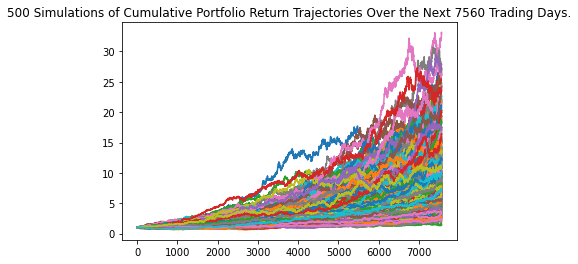

In [20]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

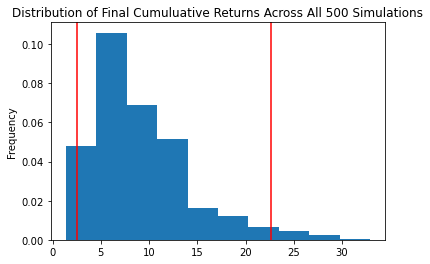

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.058207
std               5.133049
min               1.366803
25%               5.390774
50%               7.761846
75%              11.479018
max              32.920631
95% CI Lower      2.566555
95% CI Upper     22.643673
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51331.1 and $452873.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76996.65 and $679310.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5year.portfolio_data.tail()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-03-28 04:00:00+00:00       27246  106.295912     0.002451  452.05   
2022-03-29 04:00:00+00:00       33651  106.734051     0.004701  460.07   
2022-03-30 04:00:00+00:00       24975  107.007713     0.002714  460.29   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.92   
2022-04-01 04:00:00+00:00       40126  106.667931    -0.003268  453.30   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2022-03-28 04:00:00+00:00  455.910  450.060  455.84   68744767      624225   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53   86682895      738526   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79   79668682      659199   
2022-03-31 04:00:00+00:00  458.760  451.160  452.11  118607132      751169   
2022-04-01 04:00:00+00:00  453.460  449.140  452.92   88676014      624745   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-03-28 04:00:00+00:00  453.296491     0.006958  
2022-03-29 04:00:00+00:00  459.632992     0.012482  
2022-03-30 04:00:00+00:00  459.158702    -0.005937  
2022-03-31 04:00:00+00:00  455.444107    -0.014560  
2022-04-01 04:00:00+00:00  451.850848     0.001792

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Mirek\JUPITER\USYD-VIRT-FIN-PT-03-2022-U-LOL-main(1)\USYD-VIRT-FIN-PT-03-2022-U-LOL-main\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004632,1.002343,0.993801,1.008236,1.012007,1.006725,0.987841,1.003008,0.996148,0.989319,...,1.005532,0.997583,1.002604,0.994939,1.010795,1.002162,1.002893,0.991932,1.003619,0.999453
2,0.992302,0.999042,0.990745,1.005609,1.000620,1.001847,0.984656,1.018212,0.999366,0.997981,...,0.999048,1.001647,0.998332,0.993240,1.010643,0.988396,1.008268,0.992633,1.003089,1.007071
3,1.007436,0.986840,0.977612,1.010778,1.002403,0.988023,0.982863,1.016821,1.000902,1.001815,...,0.986923,0.997875,0.998903,0.992458,1.005654,0.978001,0.997291,0.998173,0.995540,1.002424
4,0.998110,0.981064,0.983723,1.017839,0.993507,0.992249,0.990866,1.013037,1.000924,0.996372,...,0.994116,0.995659,1.007526,0.980704,0.996568,0.986259,0.987740,1.004910,0.995224,0.996161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.633630,1.629993,1.545354,1.115511,0.948514,1.904564,1.154796,0.943407,2.200745,1.226263,...,1.441204,1.969746,1.394287,1.091312,0.927521,1.278064,1.341507,1.102843,1.282582,1.580060
1257,1.646106,1.639629,1.559138,1.121537,0.946184,1.880436,1.160864,0.941177,2.205246,1.224312,...,1.439776,1.967486,1.404630,1.079685,0.926382,1.254419,1.333665,1.093860,1.287458,1.596187
1258,1.652878,1.637496,1.560831,1.120596,0.936636,1.900103,1.169515,0.953090,2.182612,1.223934,...,1.445828,1.965314,1.400806,1.087934,0.924077,1.238472,1.333973,1.093379,1.294632,1.592120
1259,1.633108,1.625702,1.567618,1.115073,0.944676,1.898303,1.177781,0.959332,2.188455,1.211451,...,1.443099,1.961702,1.421605,1.095939,0.920044,1.217524,1.341138,1.099067,1.309844,1.601236


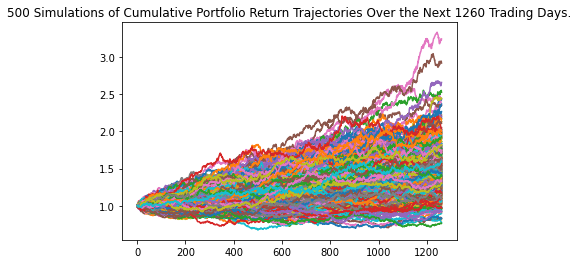

In [27]:
# Plot simulation outcomes
line_plot_5yrs = MC_5year.plot_simulation()

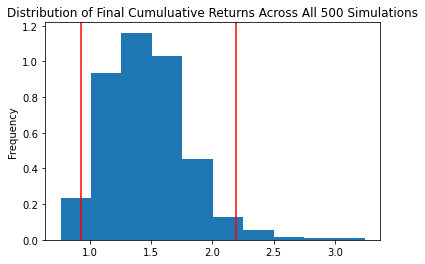

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_5yrs = MC_5year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yrs = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yrs)

count           500.000000
mean              1.465373
std               0.333800
min               0.762501
25%               1.225307
50%               1.426042
75%               1.646100
max               3.243280
95% CI Lower      0.930114
95% CI Upper      2.190091
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5yrs = round(tbl_5yrs[8]*20000,2)
ci_upper_5yrs = round(tbl_5yrs[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yrs} and ${ci_upper_5yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18602.28 and $43801.83


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_10year.portfolio_data.tail()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36   8540551   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  11396549   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  11544378   
2022-03-31 04:00:00+00:00  107.19  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-03-28 04:00:00+00:00       27246  106.295912     0.002451  452.05   
2022-03-29 04:00:00+00:00       33651  106.734051     0.004701  460.07   
2022-03-30 04:00:00+00:00       24975  107.007713     0.002714  460.29   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.92   
2022-04-01 04:00:00+00:00       40126  106.667931    -0.003268  453.30   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2022-03-28 04:00:00+00:00  455.910  450.060  455.84   68744767      624225   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53   86682895      738526   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79   79668682      659199   
2022-03-31 04:00:00+00:00  458.760  451.160  452.11  118607132      751169   
2022-04-01 04:00:00+00:00  453.460  449.140  452.92   88676014      624745   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-03-28 04:00:00+00:00  453.296491     0.006958  
2022-03-29 04:00:00+00:00  459.632992     0.012482  
2022-03-30 04:00:00+00:00  459.158702    -0.005937  
2022-03-31 04:00:00+00:00  455.444107    -0.014560  
2022-04-01 04:00:00+00:00  451.850848     0.001792

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Mirek\JUPITER\USYD-VIRT-FIN-PT-03-2022-U-LOL-main(1)\USYD-VIRT-FIN-PT-03-2022-U-LOL-main\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996685,0.994584,1.008763,1.002465,1.010451,1.002419,1.003326,0.993715,0.997648,0.990418,...,1.007484,1.010892,1.003336,0.992844,1.009310,1.003460,1.001002,1.007207,1.002805,1.000993
2,1.006830,1.000314,1.018019,1.004350,1.011883,0.995211,1.011482,1.004271,0.996717,0.989174,...,1.014599,1.014452,1.004098,0.997219,0.991947,1.000922,1.002768,1.021175,1.008911,1.005264
3,1.010730,0.995740,1.009873,0.996739,1.001273,1.000059,1.014311,1.000584,1.004901,0.979042,...,1.022390,1.009186,1.010666,0.995800,0.996553,1.002951,0.998451,1.014132,1.011080,1.016307
4,1.010573,0.995100,1.002104,0.992571,0.999188,1.001652,1.020276,1.012629,0.996422,0.973558,...,1.025306,1.008256,1.014718,0.991290,1.000326,1.006415,1.001094,1.011208,1.014531,1.015074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.560872,1.996853,1.079167,1.894377,1.328998,1.823107,3.069855,3.242777,1.776893,2.162222,...,1.402049,2.062420,3.166120,2.347984,1.586330,3.174498,2.316749,2.012970,2.800639,1.475390
2517,1.555217,1.973396,1.077341,1.885287,1.321481,1.820593,3.055794,3.253111,1.774201,2.167461,...,1.405280,2.080370,3.161580,2.361272,1.573218,3.216543,2.313128,2.007460,2.785646,1.469561
2518,1.540934,1.978166,1.075291,1.884764,1.323200,1.825590,3.061196,3.265323,1.765399,2.147573,...,1.384945,2.073739,3.167515,2.362017,1.587253,3.230097,2.317167,1.984607,2.793968,1.468416
2519,1.550821,1.999843,1.078141,1.881139,1.313343,1.821260,3.105126,3.283891,1.750182,2.131758,...,1.392356,2.059793,3.141874,2.369681,1.584549,3.255836,2.330572,1.973777,2.791887,1.463924


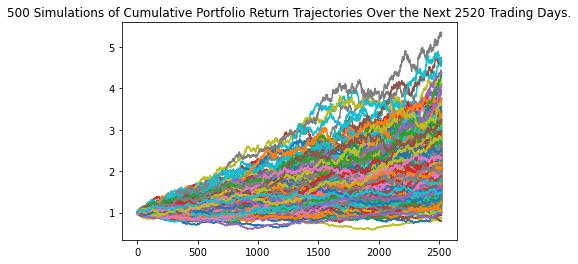

In [33]:
# Plot simulation outcomes
MC_10year_line = MC_10year.plot_simulation()

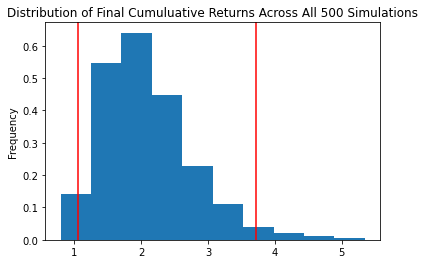

In [34]:
# Plot probability distribution and confidence intervals
MC_10year_line = MC_10year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results

MC_10year_stats = MC_10year.summarize_cumulative_return()

# Print summary statistics
MC_10year_stats

count           500.000000
mean              2.088028
std               0.688297
min               0.791472
25%               1.611557
50%               1.980009
75%               2.434617
max               5.349848
95% CI Lower      1.060301
95% CI Upper      3.725366
Name: 2520, dtype: float64

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_10yrs = round(MC_10year_stats[8]*20000,2)
ci_upper_10yrs = round(MC_10year_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_upper_10yrs} and ${ci_lower_10yrs}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $74507.31 and $21206.01
